In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("MadaLine.csv",header=None)
data.columns = ['x', 'y', 'T']
data['T'].replace([0,1],[1,-1],inplace=True)

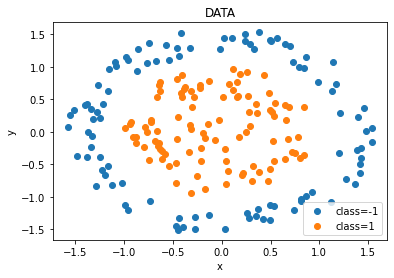

In [3]:
plt.scatter(data[data['T']==-1]['x'],data[data['T']==-1]['y'],label="class=-1")
plt.scatter(data[data['T']==1]['x'],data[data['T']==1]['y'],label="class=1")
plt.title("DATA")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [4]:
def sign(y):
    if y<0:
        out = -1
    else:
        out = 1
    return out

In [23]:
class Mad:
    def __init__(self, iteration, learning_rate, num_of_neurons):
        self.epoch = iteration
        self.lr = learning_rate
        self.W = np.random.rand(num_of_neurons,2)
        self.b = np.random.rand(num_of_neurons,1)
        self.bout = -num_of_neurons+1
        self.Wout = np.ones(num_of_neurons)
        self.error = []
        
    def fit(self,data):
        for i in range(self.epoch):
            loss =[]
            for point in data.iterrows():
                z1 = np.matmul(self.W,np.array([point[1][0],point[1][1]]).reshape(2,1)) +self.b
                a1 = np.array(list(map(sign,z1)))   #### G(x)
                z2 = (np.dot(self.Wout,a1)) +self.bout
                a2 = sign(z2)  #### H(x)
                if a2!=point[1][2]:
                    if point[1][2]==1:
                        for j in range(len(self.W)):
                            if a1[j]!=1:
                                self.W[j] = self.W[j] + self.lr*(point[1][2]-z1[j])*np.array([point[1][0],point[1][1]])
                                self.b[j] = self.b[j] + self.lr*(point[1][2]-z1[j])
                    if point[1][2]==-1:
                        indx = np.argmin(z1)
                        self.W[indx] = self.W[indx] + self.lr*(point[1][2]-z1[indx])*np.array([point[1][0],point[1][1]])
                        self.b[indx] = self.b[indx] + self.lr*(point[1][2]-z1[indx])
                loss.append(0.5*(point[1][2]-a2)**2)
            self.error.append(np.mean(loss))
            
    def show_error(self):
        plt.plot(self.error)
        plt.title("error")
        plt.xlabel("epoch")
        plt.ylabel("error")
        plt.grid()
        
    def accuracy(self):
        count =0
        for point in data.iterrows():
            z1 = np.matmul(self.W,np.array([point[1][0],point[1][1]]).reshape(2,1)) +self.b
            a1 = np.array(list(map(sign,z1)))   #### G(x)
            z2 = (np.dot(self.Wout,a1)) +self.bout
            a2 = sign(z2)  #### H(x)
            if a2==point[1][2]:
                count+=1
                
        print('accuracy= ',count/data.shape[0]*100)

In [24]:
def plot(model,num_of_neurons):
    x = np.linspace(-1.75,1.75,100)
    for i in range(num_of_neurons):
        y = -(model.b[i])/(model.W[i][1]) - ((model.W[i][0])/(model.W[i][1]))*x
        plt.plot(x,y)

    plt.scatter(data[data['T']==-1]['x'],data[data['T']==-1]['y'],label="class=-1")
    plt.scatter(data[data['T']==1]['x'],data[data['T']==1]['y'],label="class=1")
    plt.title("DATA")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.legend()
    plt.grid()
    plt.show()

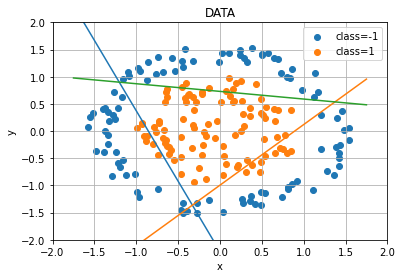

accuracy=  86.5


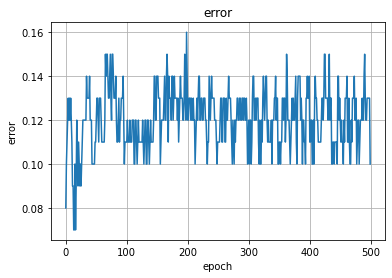

In [32]:
iteration = 500
learning_rate = 0.15
num_of_neurons = 3

model = Mad(iteration, learning_rate, num_of_neurons);
model.fit(data)

plot(model,num_of_neurons)
model.show_error()
model.accuracy()

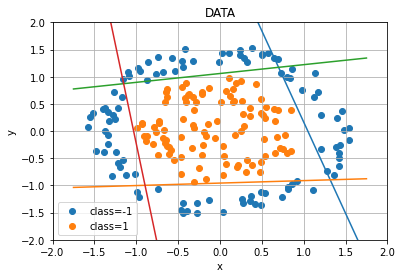

accuracy=  100.0


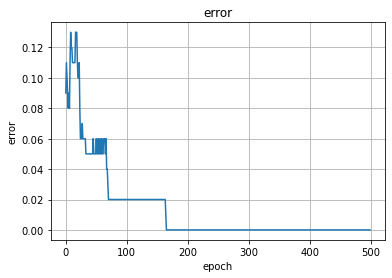

In [28]:
iteration = 500
learning_rate = 0.15
num_of_neurons = 4

model = Mad(iteration, learning_rate, num_of_neurons);
model.fit(data)

plot(model,num_of_neurons)
model.show_error()
model.accuracy()

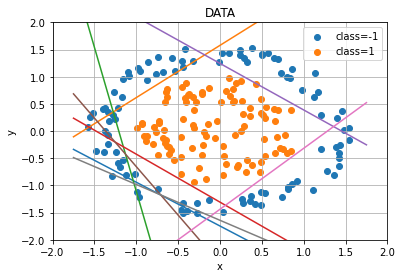

accuracy=  100.0


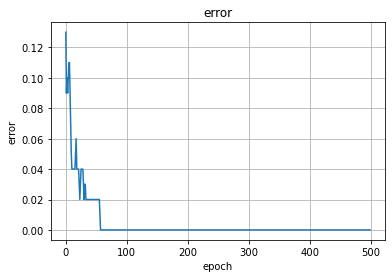

In [29]:
iteration = 500
learning_rate = 0.15
num_of_neurons = 8

model = Mad(iteration, learning_rate, num_of_neurons);
model.fit(data)

plot(model,num_of_neurons)
model.show_error()
model.accuracy()